# Python ja tekoäly, koodauksen perusteet

# Koulutus: 28.11.2019

# Aihe: Monimuuttujaregressio

Huom! Tämä notebook on kopio edellisestä harjoituksesta, jossa käsittelimme yksinkertaista, yhden muuttujan lineaarista regressiota. Nyt tarkoituksena on yleistää tätä monen muuttujan lineaariseen regressioon. Tällaisessa mallissa on monta syötemuuttujaa x ja yksi vastemuuttuja y.

Tässä harjoituksessa rakennamme kokonaisen analyysiketjun, jossa ladataan data jollain opitulla tavalla. Datasta valitaan halutut muuttujat, ja tehdään ennustin. Ennustimen tarkkuus mitataan huolellisesti ristiinvalidoimalla.

Ensin tarvitaan kuitenkin tavalliset kirjastot, josta saamme tietorakenteita ja funktiota käyttöön:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Harjoitus 1. Muokkkaa alla olevaa notebookia niin, että saat opittua monen muuttujan lineaarisen mallin datasta. Voit ladata vaikka sklearn-kirjastosta datan funktiolla fetch_california_housing (katso dokumentaatiota!)

In [3]:
(california_x, california_y) = datasets.fetch_california_housing(return_X_y=True)

In [4]:
california_x.shape

(20640, 8)

In [5]:
california_y.shape

(20640,)

In [10]:
type(california_x)

numpy.ndarray

# Opeta lineaarinen malli datasta

## Jaa data opetusjoukkoon ja validointijoukkoon:

Opetetaan malli opetusdatasta, jätä toistaiseksi validointidata käyttämättä:

In [6]:
data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
...     california_x, california_y, test_size=0.2, random_state=0)

In [28]:
type(data_x_opetus)

numpy.ndarray

In [13]:
# Luo ensin mallin objekti tai muuttuja:
lm = LinearRegression(fit_intercept=True)

# Lineaarinen malli sovitetaan opetusdataan:
lm.fit(data_x_opetus,data_y_opetus)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
lm.coef_

array([  4.36696589e-01,   9.45685745e-03,  -1.04370348e-01,
         6.21279596e-01,  -5.19186407e-06,  -3.43201121e-03,
        -4.15480618e-01,  -4.26055329e-01])

In [31]:
lm.intercept_

-36.130897309074498

# Laske mallin opetusvirhe ja validointivirhe



In [15]:
# Lasketaan ennustusten opetusvirhe (MSE = mean squared error eli keskimääräinen neliövirhe)
ennustukset_opetus = lm.predict(data_x_opetus)
opetus_mse = mean_squared_error(data_y_opetus, ennustukset_opetus)
opetus_mse

0.52344136071254477

In [16]:
# Lasketaan ennustusten validointivirhe
ennustukset_validointi = lm.predict(data_x_validointi)
validointi_mse = mean_squared_error(data_y_validointi, ennustukset_validointi)
validointi_mse

0.52898416703672457

# Ristiinvalidointi 

Nyt harjoitellaan ristiinvaidointia, jossa data jaetaan opetusjoukkoon ja validointijoukkoon monta kertaa. Kullekin jaolle opetetaan malli opetusdatalla ja mallille lasketaan sekä opetusvirhe että validointivirhe.

In [17]:
# Opetusvirheet tallennetaan taulukkoon:
opetus_mse = np.zeros(10)
opetus_r2 = np.zeros(10)

# Validointivirheet tallenetaan taulukkoon:
validointi_mse = np.zeros(10)
validointi_r2 = np.zeros(10)

# Toista jako opetus- ja validointidataan 10 kertaa, opeta
# joka kerta uusi malli, jolle lasket opetusvirheen (opetusdatan
# avulla) ja validointivirheen(validointidatan avulla)

for i in np.arange(0,10):
  data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(california_x, california_y, test_size=0.2, random_state=689*i)

  # Opetetaan malli tällä nimenomaisella jaolla!
  lm.fit(data_x_opetus,data_y_opetus)

  # Lasketaan ennustusten opetusvirhe (MSE ja R2):
  ennustukset_opetus = lm.predict(data_x_opetus)
  opetus_mse[i] = mean_squared_error(data_y_opetus, ennustukset_opetus)
  opetus_r2[i] = r2_score(data_y_opetus, ennustukset_opetus)

  # Lasketaan ennustusten validointivirhe (MSE ja R2):
  ennustukset_validointi = lm.predict(data_x_validointi)
  validointi_mse[i] = mean_squared_error(data_y_validointi, ennustukset_validointi)
  validointi_r2[i] = r2_score(data_y_validointi, ennustukset_validointi)

In [18]:
# 10 toistoa, 10 virhettä (MSE):
print(opetus_mse)

[ 0.52344136  0.52068759  0.533675    0.51830551  0.52613404  0.52764838
  0.52657429  0.52765991  0.5305413   0.52366648]


In [19]:
# Yleensä raportoidaan toistettujen mallinnusten keskimääräinen virhe:
print(np.mean(opetus_mse))

0.525833386826


In [20]:
# Kymmenen toistoa, 10 virhettä (MSE)
print(validointi_mse)

[ 0.52898417  0.53954307  0.50334148  0.54892555  0.51868242  0.51110481
  0.515941    0.51144044  0.50680523  0.52744176]


In [21]:
# Yleensä raportoidaan toistettujen mallinnusten keskimääräinen virhe:
print(np.mean(validointi_mse))

0.521220991081


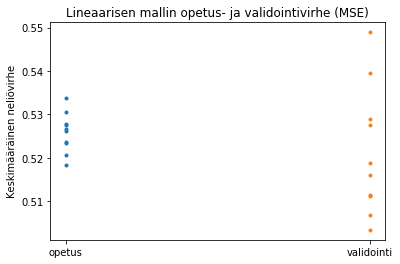

In [22]:
# Tee tuloskuva, jossa opetusvirheet ja validointivirheet
# on visualisoitu:
plt.plot(np.ones((10,1)), opetus_mse, '.')
plt.plot(2*np.ones((10,1)), validointi_mse, '.')
plt.title('Lineaarisen mallin opetus- ja validointivirhe (MSE)')
plt.xticks([1,2], ['opetus', 'validointi'])
plt.ylabel('Keskimääräinen neliövirhe')
plt.show()

In [23]:
# 10 toistoa, 10 selitysastetta:
print(opetus_r2)

[ 0.60889681  0.60488227  0.60278695  0.61049895  0.60639793  0.60447298
  0.60267561  0.60557329  0.60630199  0.60436976]


In [24]:
# Yleensä raportoidaan toistettujen mallinnusten keskimääräinen selitysaste:
print(np.mean(opetus_r2))

0.605685653238


In [25]:
# 10 toistoa, 10 selitysastetta:
print(validointi_r2)

[ 0.59432327  0.61079434  0.60766565  0.58879472  0.60429769  0.6132193
  0.61953394  0.60856282  0.59989417  0.6129403 ]


In [26]:
# Yleensä raportoidaan toistettujen mallinnusten keskimääräinen selitysaste:
print(np.mean(validointi_r2))

0.606002619583


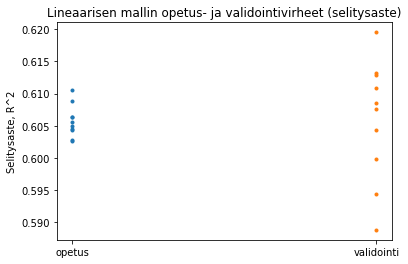

In [27]:
# Tee tuloskuva, jossa opetusvirheet ja validointivirheet
# on visualisoitu:
plt.plot(np.ones((10,1)), opetus_r2, '.')
plt.plot(2*np.ones((10,1)), validointi_r2, '.')
plt.title('Lineaarisen mallin opetus- ja validointivirheet (selitysaste)')
plt.xticks([1,2], ['opetus', 'validointi'])
plt.ylabel('Selitysaste, R^2')
plt.show()

Tehtävä 2. Kokeile samaa analyysiketjua jollakin muulla datalla, jossa on monta syötemuuttuja ja yksi vastemuuttuja. Voit valita datan vaikka kirjastosta sklearn.datasets ja poimia datasta haluamasi syötemuuttujat x ja vastemuuttujan y.

Oikeat arvot vs. ennustetut plotattuna. 
X=Oikeat (california_y)
Y=Ennustetut

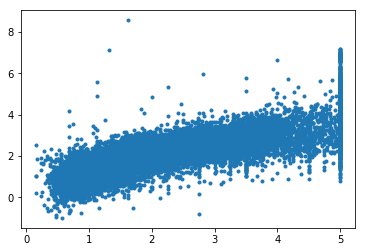

In [32]:
plt.plot(california_y, lm.predict(california_x), '.')